In ***ASP.NET Core 2.0*** and ***2.1***, There was **no dedicated** `routing middleware` in the ***middleware pipeline***  
**routing** happened only within `Razor Pages` or `MVC components`

ASP.NET Core `3.0` introduced a new routing system: `endpoint routing`.  
It’s implemented with two pieces of middleware  
- `EndpointRoutingMiddleware` : This middleware chooses ***which registered endpoints*** `execute` for a g`iven request at runtime`. 

- `EndpointMiddleware` : This middleware is typically placed at the ***end of your middleware pipeline***. The middleware `executes` the `endpoint selected` by the **RoutingMiddleware** at runtime.

##### How register endpoints?

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

builder.Services.AddHealthChecks();
builder.Services.AddRazorPages();
builder.Services.AddControllersWithViews();

WebApplication app = builder.Build();

app.MapGet("/test", () => "Hello world!");

app.MapHealthChecks("/healthz");

app.MapRazorPages();

app.MapDefaultControllerRoute();

app.Run();

`Each endpoint` is ***associated*** with a `route template` that defines which URLs
the endpoint should match.

A `route template` is a ***URL pattern*** that is used to ***match against request URLs***

The ***WebApplication*** `stores` the ***registered routes and endpoints*** in a
`dictionary` that’s **shared** by the `RoutingMiddleware` and the `EndpointMiddleware`.

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<h5>مراحل عملکرد در زمان اجرا:</h5>
<ol><li><p><strong>مقایسه درخواست با مسیرها:</strong> وقتی یک درخواست وارد برنامه می‌شود، RoutingMiddleware آن را با مسیرهایی که در دیکشنری ثبت شده‌اند مقایسه می‌کند.</p></li><li><p><strong>انتخاب نقطه پایانی:</strong> اگر RoutingMiddleware یک نقطه پایانی مطابق با درخواست پیدا کند، این نقطه پایانی را انتخاب کرده و آن را به شیء HttpContext درخواست ضمیمه می‌کند. سپس درخواست را به میان‌افزار بعدی در زنجیره ارسال می‌کند.</p></li><li><p><strong>اجرای نقطه پایانی:</strong> وقتی درخواست به EndpointMiddleware می‌رسد، این میان‌افزار بررسی می‌کند که کدام نقطه پایانی انتخاب شده است و سپس آن را (و هر فیلتر مربوط به نقطه پایانی) اجرا می‌کند.</p></li></ol>

<h5>عدم تطابق درخواست با مسیرها:</h5>
<ul><li><p><strong>بدون انتخاب نقطه پایانی:</strong> اگر URL درخواست با هیچ قالب مسیری مطابق نباشد، RoutingMiddleware هیچ نقطه پایانی را انتخاب نمی‌کند، اما درخواست همچنان به مسیر خود در زنجیره میان‌افزارها ادامه می‌دهد.</p></li><li><p><strong>نادیده گرفتن درخواست:</strong> وقتی درخواست به EndpointMiddleware می‌رسد و هیچ نقطه پایانی انتخاب نشده باشد، این میان‌افزار درخواست را نادیده می‌گیرد و آن را به میان‌افزار بعدی در زنجیره ارسال می‌کند.</p></li></ul>
<h5>پاسخ 404 Not Found:</h5>
<ul><li><strong>پایان زنجیره:</strong> معمولاً EndpointMiddleware آخرین میان‌افزار در زنجیره است، بنابراین میان‌افزار بعدی یک میان‌افزار موقت است که همیشه پاسخ 404 Not Found را برمی‌گرداند.</li></ul>
</div>

***Only*** middleware placed `after` the ***RoutingMiddleware*** `can detect` **which
endpoint** is going to be `executed`.

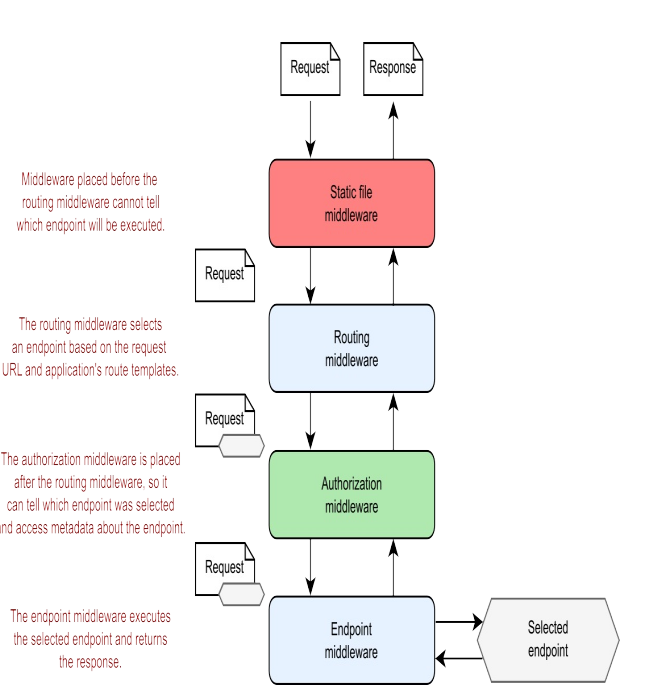